C:\Users\JN\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


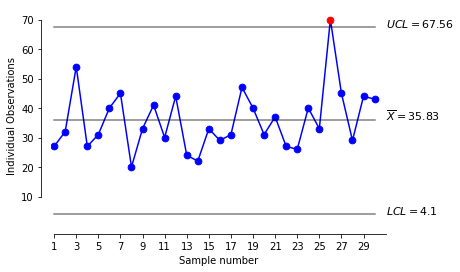

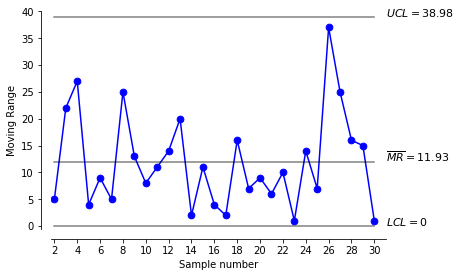

In [14]:
#Script 2.1
#VARIABLE CHARTS- IMR charts
#import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns

data = read_excel ()#upload Chap2.xlsx IMR tab
xr = data.xt
xbar = mean(xr)
d2 = 1.128
D3 = 0.
D4 = 3.267
mr = [abs(xr[i]-xr[i-1]) for i in range(1, len(xr))]
mrbar = mean(mr)
UCLa = [xbar + 3.*(mrbar/d2)]*len(xr)
LCLa = [ max(0,xbar - 3.*(mrbar/d2))]*len(xr)
CLa = [xbar]*len(xr)

markers = []
colors = []
for i in range (len(data)):
    x1 = data.ix[i]['xt']
    if x1 > UCLa[0]:
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#Plotting
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCLa, 'k-', alpha = 0.5)
ax1.plot(LCLa, 'k-',alpha = 0.5)
ax1.plot(CLa, 'k-',alpha = 0.5)
ax1.plot(xr,'b-',zorder=1, alpha = 1.)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
#ylim(ymin = -0.5) 
xlim(xmin = -0.3) 
xlim(-0.3, t[-1]+1) 
sns.color_palette("Blues")
sns.despine(offset=10, top = True, trim=True)
sns.axes_style({'xtick.right': False})
ax1.set_xlabel('Sample number')
ax1.set_ylabel('Individual Observations')
ax1.yaxis.set_ticks_position('left') #remove yticks from right up 
ax1.xaxis.set_ticks_position('bottom') #remove yticks from right up  
ax1.annotate ('$UCL=$'+str(round(UCLa[0],2)), xy = (xlim()[1], list(UCLa)[-1]), xytext = (xlim()[1],list(UCLa)[-1]),fontsize = 11)
#ax1.annotate ('$\overline{X}=$'+str(round(CLa[0],2)), xy = (xlim()[1], list(CLa)[-1]), xytext = (xlim()[1],list(CLa)[-1]),fontsize = 11)
ax1.annotate ('$\overline{X}=$'+str(round(CLa[0],2)), xy = (xlim()[1], list(CLa)[-1]), xytext = (xlim()[1],list(CLa)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCLa[0],2)), xy = (xlim()[1], list(LCLa)[-1]), xytext = (xlim()[1],list(LCLa)[-1]),fontsize = 11)
xticks(arange(len(data), step = 2), arange(1, len(data)+1, step = 2))
show()

#plot MR chart
UCLa = [mrbar*D4]*len(mr)
LCLa = [max(0,mrbar*D3)]*len(mr)
CLa = [mrbar ]*len(mr)

markers = []
colors = []

for i in range (len(mr)):
    x1 = mr[i]
    x2 = UCLa[i]
    x3 = LCLa[i]
    if (x1 > x2 or  x1<x3) :
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#Plotting Xbar
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCLa, 'k-', alpha = 0.5)
ax1.plot(LCLa, 'k-',alpha = 0.5)
ax1.plot(CLa, 'k-',alpha = 0.5)
ax1.plot(mr,'b-',zorder=1)
for x,y,c,m in zip(t, mr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
ylim(-0.5, 40) 
xlim(-0.3, t[-1]) 
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
ax1.set_xlabel('Sample number')
ax1.set_ylabel('Moving Range')
ax1.yaxis.set_ticks_position('left') #remove yticks from right up 
ax1.xaxis.set_ticks_position('bottom') #remove yticks from right up 
ax1.annotate ('$UCL=$'+str(round(UCLa[-1],2)), xy = (xlim()[1], list(UCLa)[-1]), xytext = (xlim()[1],list(UCLa)[-1]),fontsize = 11)
ax1.annotate (r'$\overline{MR}=$'+str(round(CLa[0],2)), xy = (xlim()[1], list(CLa)[-1]), xytext = (xlim()[1],list(CLa)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCLa[-1],2)), xy = (xlim()[1], list(LCLa)[-1]), xytext = (xlim()[1],list(LCLa)[-1]),fontsize = 11)
xticks(arange(len(data), step = 2), arange(2, len(data)+2, step = 2))
#ax1.legend(fancybox=True,fontsize='medium',markerscale=0.8,labelspacing=0.1).draggable()
show()

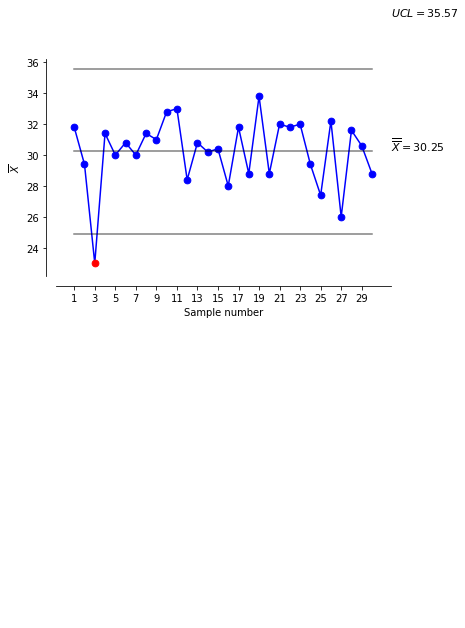

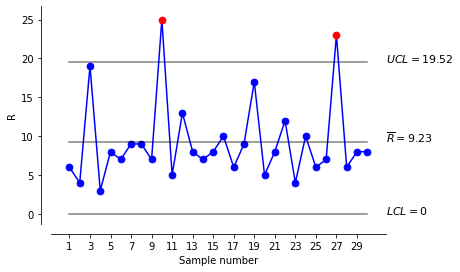

In [15]:
#Script 2.2
#VARIABLE CHARTS- XbarR charts
#Import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
#import data from an excel spreadsheet
data = read_excel()#upload Chap2.xlsx XbarR tab
#if column names in Excel, select the column of interest (e.g., data = data['column name']
xr =  [mean(data.loc[i]) for i in range(len(data))]
t = arange(len(data))
rr =  [max(data.loc[i])-min(data.loc[i])*1. for i in range(len(data))]
xbar = mean(xr)
rbar = mean(rr)
#Xbar chart
#parameters from Appendix Table 1. Below is an example of values when n = 5
A2 = 0.577
D3 = 0.
D4 = 2.114
#control limits
UCL = [xbar + A2*rbar]*len(xr)
LCL = [max(0,xbar - A2*rbar)]*len(xr)
CL = [xbar]*len(xr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue.
markers = []
colors = []
for i in range (len(xr)):
    x1 = xr[i]
    x2 = UCL[i]
    x3 = LCL[i]
    if (x1 > x2 or  x1<x3) :
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')        
#plotting Xbar
fig=figure()
ax1 =  fig.add_subplot(111)
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel(r'$\overline{X}$')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCLa)[-1]),fontsize = 11)
ax1.annotate (r'$\overline{\overline{X}}=$'+str(round(CL[0],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCLa)[-1]), xytext = (xlim()[1],list(LCLa)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(data), step = 2), arange(1, len(data)+1, step = 2))
show()
#########################
#R chart
#control limits
UCL = [rbar*D4]*len(xr)
LCL = [max(0,rbar*D3)]*len(xr)
CL = [rbar]*len(xr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue
markers = []
colors = []
for i in range (len(xr)):
    x1 = rr[i]
    x2 = UCL[i]
    x3 = LCL[i]
    if (x1 > x2 or  x1<x3) :
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#plotting R-chart
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(rr,'b-',zorder=1)
for x,y,c,m in zip(t, rr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel('R')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate (r'$\overline{R}=$'+str(round(CL[0],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(data), step = 2), arange(1, len(data)+1, step = 2))
show()


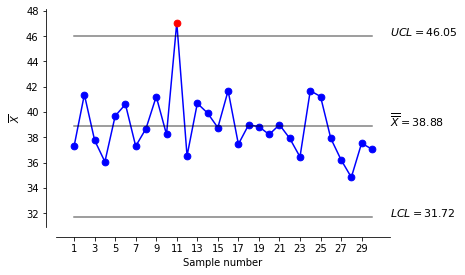

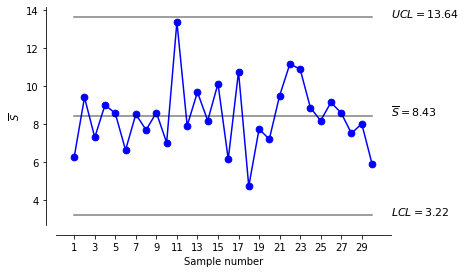

In [16]:
#Script 2.3
#VARIABLE CHARTS- XbarS charts
#Import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
#import data from an excel spreadsheet
data = read_excel()#upload Chap2.xlsx XbarS tab
#if column names in Excel, select the column of interest (e.g., data = data['column name']
xr =  [mean(data.loc[i]) for i in range(len(data))]
sd =  [std(data.loc[i], ddof = 1)*1. for i in range(len(data))]
xbar = mean(xr)
sdbar = mean(sd)
t = arange(len(data))
#parameters fro Appendix Table 1. Next is an example of values when n = 13
A3 = 0.850
B3 = 0.382
B4 = 1.618
#Xbar chart
#control limits
UCL = [xbar + A3*sdbar]*len(xr)
LCL = [max(0,xbar - A3*sdbar)]*len(xr)
CL = [xbar]*len(xr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue.
markers = []
colors = []
for i in range (len(xr)):
    x1 = xr[i]
    x2 = UCL[i]
    x3 = LCL[i]
    if (x1 > x2 or  x1<x3) :
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#plotting Xbar
fig=figure()
ax1 =  fig.add_subplot(111)
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel(r'$\overline{X}$')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate (r'$\overline{\overline{X}}=$'+str(round(CL[0],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(data), step = 2), arange(1, len(data)+1, step = 2))
show()
#########################
#S chart
#control limits
UCL = [sdbar*B4]*len(xr)
LCL = [max(0,sdbar*B3)]*len(xr)
CL = [sdbar]*len(xr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue
markers = []
colors = []
for i in range (len(xr)):
    x1 = sd[i]
    x2 = UCL[i]
    x3 = LCL[i]
    if (x1 > x2 or  x1<x3) :
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#plotting S chart
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(sd,'b-',zorder=1)
for x,y,c,m in zip(t, sd, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#pabel y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel(r'$\overline{S}$')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate (r'$\overline{S}=$'+str(round(CL[0],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(data), step = 2), arange(1, len(data)+1, step = 2))
show()


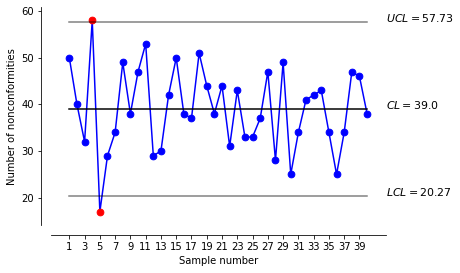

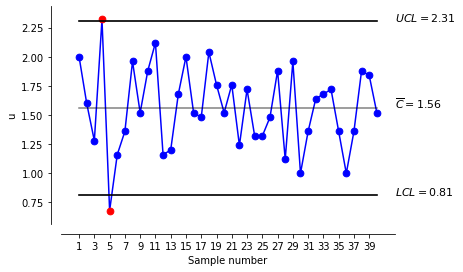

In [17]:
#Script 2.4
#ATTRIBUTE CHARTS C and U
#import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
#Import data from an excel spreadsheet
#Ci is the column of defects and Ni is the column of sample sizes
data = read_excel()#upload Chap2.xlsx CandU tab
#C-CHART 
xr = data.Ci
cbar = mean(data.Ci)
t = arange(len(xr))
#control limits
UCL = [cbar + 3.*sqrt(cbar)]*len(xr)
LCL = [cbar - 3.*sqrt(cbar)]*len(xr)
CL = [cbar]*len(xr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue
markers = []
colors = []
for i in range (len(xr)):
    x1 = xr[i]
    if (x1 > UCL[i] or x1<LCL[i]):
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#Plotting
fig=figure()
ax1 =  fig.add_subplot(111)
ax1.step(t,UCL, 'k-', alpha = 0.5, where = 'mid')
ax1.step(t, LCL, 'k-',alpha = 0.5,  where = 'mid')
ax1.step(t,CL, 'k-',alpha = 1, where = 'mid')
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel('Number of nonconformities')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate ('$CL=$'+str(round(CL[-1],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(data), step = 2), arange(1, len(data)+1, step = 2))
show()
##############################
#U-CHART
xr = data.Ci/data.Ni
t = arange(len(xr))
n = mean(data.Ni)
ubar = cbar/n
#control limits
UCL = [ubar + 3.*sqrt(ubar/n)]*len(xr)
LCL = [ubar - 3.*sqrt(ubar/n)]*len(xr)
CL = [ubar]*len(xr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue
markers = []
colors = []
for i in range (len(xr)):
    x1 = xr[i]
    if (x1 > UCL[i] or x1<LCL[i]):
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#plotting U chart
fig=figure()
ax1 =  fig.add_subplot(111)
ax1.step(t,UCL, 'k-', alpha = 1, where = 'mid')
ax1.step(t, LCL, 'k-',alpha = 1,  where = 'mid')
ax1.step(t,UCL, 'k-', alpha = 0.5, where = 'mid')
ax1.step(t, LCL, 'k-',alpha = 0.5,  where = 'mid')
ax1.step(t,CL, 'k-',alpha = 0.5, where = 'mid')
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel('u')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate ('$\overline{C}=$'+str(round(CL[-1],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(data), step = 2), arange(1, len(data)+1, step = 2))
show()


C:\Users\JN\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


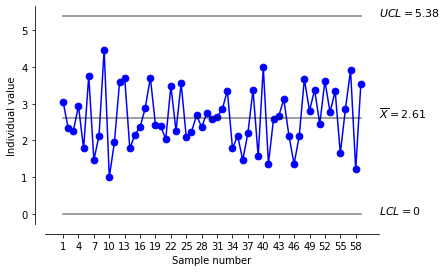

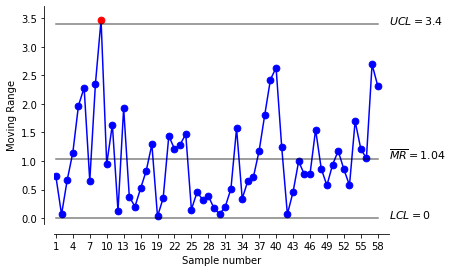

In [18]:
#Script 2.5
#ATTRIBUTE CHARTS to VARIABLE CHARTS via Nelson's transformation
#Import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
#import data from an excel spreadsheet. Days is the column with time data
data = read_excel()#upload Chap2.xlsx Nelson tab
#Nelson's transformation
data['xt'] = data['Days'].apply(lambda x: x**0.2777)
#initialize parameters for IMR charts
xr = data.xt
xbar = mean(xr)
d2 = 1.128
D3 = 0.
D4 = 3.267
mr = [abs(xr[i]-xr[i-1]) for i in range(1, len(xr))]
mrbar = mean(mr)
t = arange(len(data))
#I chart
#control limits
UCL = [xbar + 3.*(mrbar/d2)]*len(xr)
LCL = [ max(0,xbar - 3.*(mrbar/d2))]*len(xr)
CL = [xbar]*len(xr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue
markers = []
colors = []
for i in range (len(data)):
    x1 = data.ix[i]['xt']
    if x1 > UCL[0]:
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#plotting I chart
fig=figure()
ax1 =  fig.add_subplot(111)
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel('Individual value')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[0],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate ('$\overline{X}=$'+str(round(CL[0],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[0],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(data), step = 3), arange(1, len(data)+1, step = 3))
show()
####################
#MR chart
#control limits
UCL = [mrbar*D4]*len(mr)
LCL = [max(0,mrbar*D3)]*len(mr)
CL = [mrbar ]*len(mr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue
markers = []
colors = []
for i in range (len(mr)):
    x1 = mr[i]
    x2 = UCL[i]
    x3 = LCL[i]
    if (x1 > x2 or  x1<x3) :
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#plotting MR chart
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(mr,'b-',zorder=1)
for x,y,c,m in zip(t, mr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
ylim(ymin = -0.1) 
xlim(-0.3, t[-1]+1) 
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel('Moving Range')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate (r'$\overline{MR}=$'+str(round(CL[0],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(data), step = 3), arange(1, len(data)+1, step = 3))
show()
